In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from helpers.split import label_strings, tag_label_feature_split

In [2]:
def knn_experiment(dataset, n_neighbors=5):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")    
    
    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")
    
    plt.show()

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.663759

                 precision    recall  f1-score   support

    genre_blues     0.4054    0.2807    0.3318       374
genre_classical     0.7605    0.9180    0.8319      4221
  genre_country     0.6789    0.4526    0.5431       327
    genre_disco     0.3569    0.3495    0.3531       289
   genre_hiphop     0.5723    0.5632    0.5677      1701
     genre_jazz     0.5589    0.4738    0.5129      1241
    genre_metal     0.7153    0.6346    0.6725       665
      genre_pop     0.6128    0.6654    0.6380      4274
   genre_reggae     0.6083    0.3528    0.4466       788
     genre_rock     0.7179    0.6306    0.6714      3200

       accuracy                         0.6638     17080
      macro avg     0.5987    0.5321    0.5569     17080
   weighted avg     0.6572    0.6638    0.6553     17080

Test: test_accuracy = 0.524233

                 precision    recall  f1-score   support

    genre_blues     0.

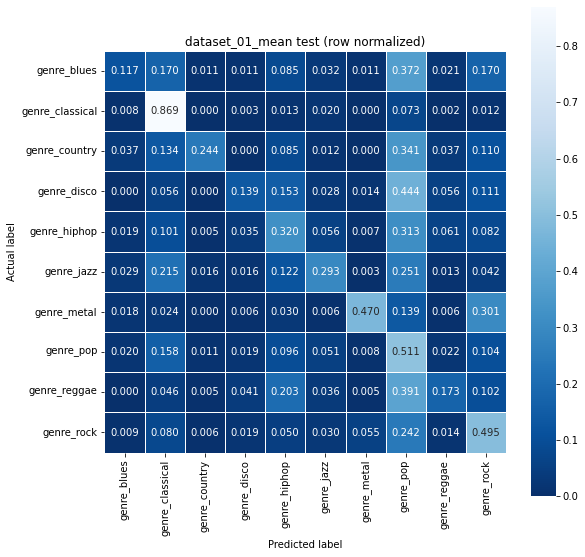



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.706089

                 precision    recall  f1-score   support

    genre_blues     0.5000    0.3529    0.4138       374
genre_classical     0.7781    0.9256    0.8455      4221
  genre_country     0.7429    0.5566    0.6364       327
    genre_disco     0.3763    0.3841    0.3801       289
   genre_hiphop     0.6782    0.5750    0.6223      1701
     genre_jazz     0.6520    0.5858    0.6171      1241
    genre_metal     0.7060    0.6391    0.6709       665
      genre_pop     0.6567    0.7050    0.6800      4274
   genre_reggae     0.7454    0.5609    0.6401       788
     genre_rock     0.7352    0.6697    0.7009      3200

       accuracy                         0.7061     17080
      macro avg     0.6571    0.5955    0.6207     17080
   weighted avg     0.7027    0.7061    0.7006     17080

Test: test_accuracy = 0.552096

                 precision    recall  f1-score   support

    genre_blues   

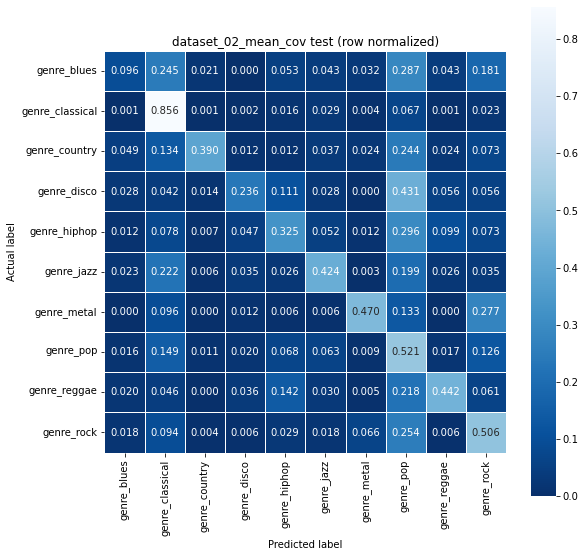



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.663700

                 precision    recall  f1-score   support

    genre_blues     0.4047    0.2781    0.3296       374
genre_classical     0.7608    0.9176    0.8318      4221
  genre_country     0.6789    0.4526    0.5431       327
    genre_disco     0.3556    0.3495    0.3525       289
   genre_hiphop     0.5720    0.5626    0.5673      1701
     genre_jazz     0.5569    0.4730    0.5115      1241
    genre_metal     0.7165    0.6346    0.6730       665
      genre_pop     0.6129    0.6661    0.6384      4274
   genre_reggae     0.6083    0.3528    0.4466       788
     genre_rock     0.7180    0.6309    0.6717      3200

       accuracy                         0.6637     17080
      macro avg     0.5985    0.5318    0.5566     17080
   weighted avg     0.6572    0.6637    0.6552     17080

Test: test_accuracy = 0.524701

                 precision    recall  f1-score   support

    genre_blues  

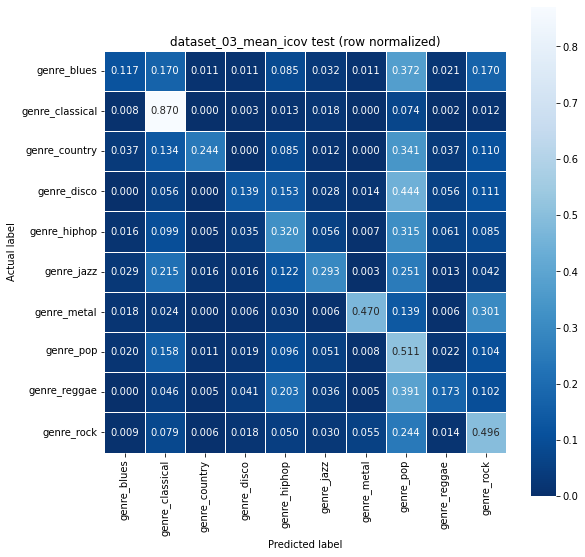



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.706089

                 precision    recall  f1-score   support

    genre_blues     0.5000    0.3529    0.4138       374
genre_classical     0.7787    0.9254    0.8457      4221
  genre_country     0.7429    0.5566    0.6364       327
    genre_disco     0.3763    0.3841    0.3801       289
   genre_hiphop     0.6782    0.5750    0.6223      1701
     genre_jazz     0.6506    0.5866    0.6169      1241
    genre_metal     0.7060    0.6391    0.6709       665
      genre_pop     0.6566    0.7050    0.6799      4274
   genre_reggae     0.7454    0.5609    0.6401       788
     genre_rock     0.7352    0.6697    0.7009      3200

       accuracy                         0.7061     17080
      macro avg     0.6570    0.5955    0.6207     17080
   weighted avg     0.7027    0.7061    0.7006     17080

Test: test_accuracy = 0.552096

                 precision    recall  f1-score   support

    genre_blu

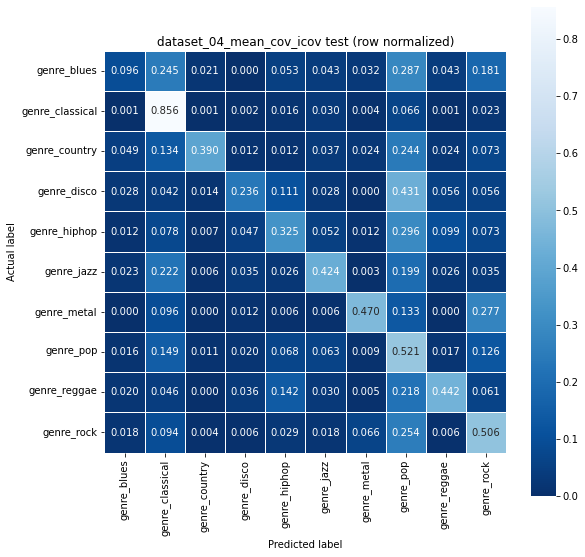



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.633899

                 precision    recall  f1-score   support

    genre_blues     0.2949    0.2460    0.2682       374
genre_classical     0.8109    0.9022    0.8541      4221
  genre_country     0.4093    0.3242    0.3618       327
    genre_disco     0.4144    0.3183    0.3601       289
   genre_hiphop     0.5013    0.5755    0.5359      1701
     genre_jazz     0.5616    0.4738    0.5140      1241
    genre_metal     0.5974    0.4105    0.4866       665
      genre_pop     0.5760    0.6490    0.6103      4274
   genre_reggae     0.5222    0.3135    0.3918       788
     genre_rock     0.6566    0.5837    0.6180      3200

       accuracy                         0.6339     17080
      macro avg     0.5345    0.4797    0.5001     17080
   weighted avg     0.6269    0.6339    0.6262     17080

Test: test_accuracy = 0.492156

                 precision    recall  f1-score   support

    genre_blues     0.

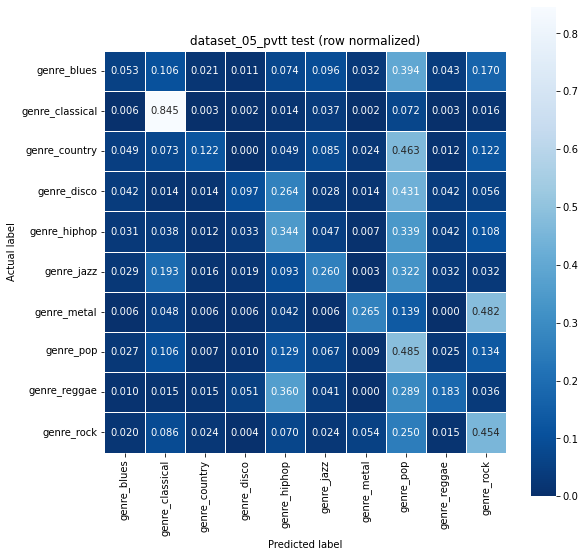



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.700527

                 precision    recall  f1-score   support

    genre_blues     0.4395    0.2914    0.3505       374
genre_classical     0.8274    0.9244    0.8732      4221
  genre_country     0.6824    0.4862    0.5679       327
    genre_disco     0.4476    0.4429    0.4452       289
   genre_hiphop     0.6057    0.6349    0.6200      1701
     genre_jazz     0.6073    0.5334    0.5680      1241
    genre_metal     0.7145    0.6586    0.6854       665
      genre_pop     0.6350    0.7043    0.6679      4274
   genre_reggae     0.6820    0.4518    0.5435       788
     genre_rock     0.7445    0.6628    0.7013      3200

       accuracy                         0.7005     17080
      macro avg     0.6386    0.5791    0.6023     17080
   weighted avg     0.6969    0.7005    0.6952     17080

Test: test_accuracy = 0.567080

                 precision    recall  f1-score   support

    genre_blues  

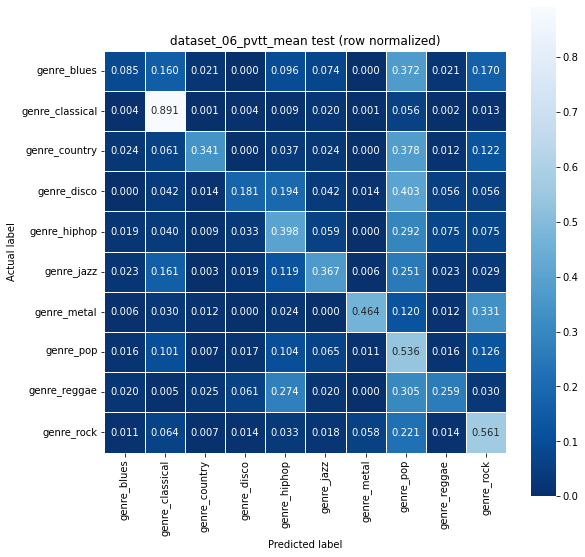



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 0.722658

                 precision    recall  f1-score   support

    genre_blues     0.4966    0.3850    0.4337       374
genre_classical     0.8211    0.9299    0.8721      4221
  genre_country     0.7400    0.5657    0.6412       327
    genre_disco     0.3720    0.4221    0.3955       289
   genre_hiphop     0.6785    0.5944    0.6337      1701
     genre_jazz     0.6670    0.6180    0.6416      1241
    genre_metal     0.7063    0.6436    0.6735       665
      genre_pop     0.6650    0.7305    0.6962      4274
   genre_reggae     0.7395    0.5799    0.6501       788
     genre_rock     0.7595    0.6819    0.7186      3200

       accuracy                         0.7227     17080
      macro avg     0.6645    0.6151    0.6356     17080
   weighted avg     0.7206    0.7227    0.7188     17080

Test: test_accuracy = 0.566846

                 precision    recall  f1-score   support

    genre_blu

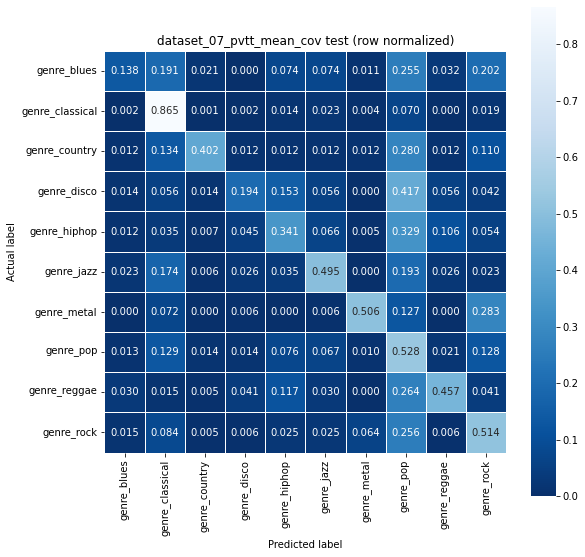



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 0.700703

                 precision    recall  f1-score   support

    genre_blues     0.4395    0.2914    0.3505       374
genre_classical     0.8276    0.9244    0.8733      4221
  genre_country     0.6824    0.4862    0.5679       327
    genre_disco     0.4476    0.4429    0.4452       289
   genre_hiphop     0.6059    0.6355    0.6204      1701
     genre_jazz     0.6079    0.5334    0.5682      1241
    genre_metal     0.7157    0.6586    0.6860       665
      genre_pop     0.6349    0.7040    0.6677      4274
   genre_reggae     0.6820    0.4518    0.5435       788
     genre_rock     0.7447    0.6637    0.7019      3200

       accuracy                         0.7007     17080
      macro avg     0.6388    0.5792    0.6025     17080
   weighted avg     0.6970    0.7007    0.6953     17080

Test: test_accuracy = 0.567080

                 precision    recall  f1-score   support

    genre_bl

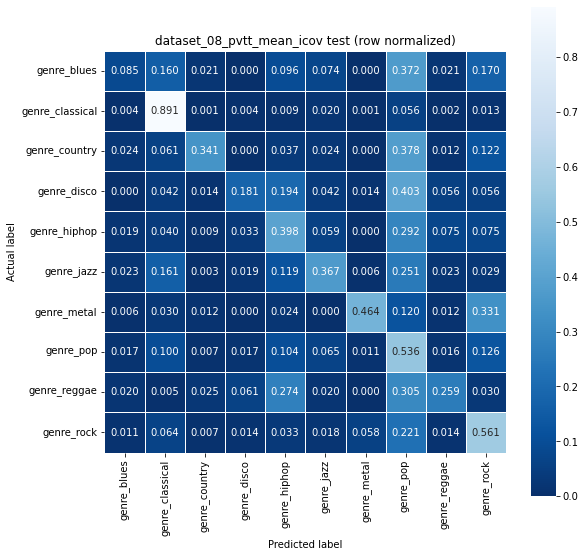



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle

Train: train_accuracy = 0.722658

                 precision    recall  f1-score   support

    genre_blues     0.4966    0.3850    0.4337       374
genre_classical     0.8211    0.9299    0.8721      4221
  genre_country     0.7400    0.5657    0.6412       327
    genre_disco     0.3720    0.4221    0.3955       289
   genre_hiphop     0.6785    0.5944    0.6337      1701
     genre_jazz     0.6670    0.6180    0.6416      1241
    genre_metal     0.7063    0.6436    0.6735       665
      genre_pop     0.6650    0.7305    0.6962      4274
   genre_reggae     0.7395    0.5799    0.6501       788
     genre_rock     0.7595    0.6819    0.7186      3200

       accuracy                         0.7227     17080
      macro avg     0.6645    0.6151    0.6356     17080
   weighted avg     0.7206    0.7227    0.7188     17080

Test: test_accuracy = 0.566612

                 precision    recall  f1-score   support

    genr

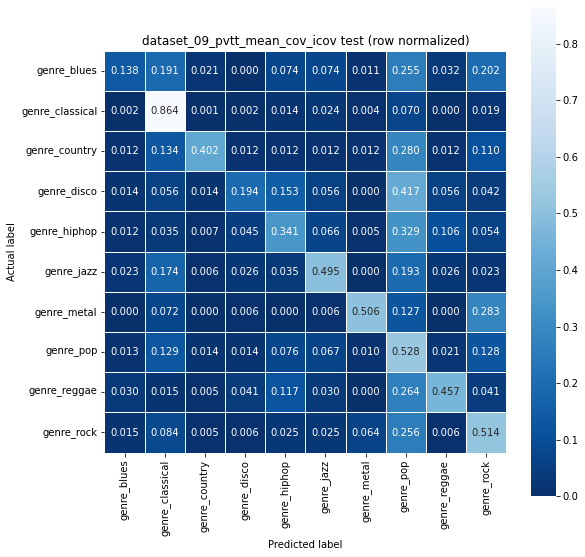

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "*.pickle")])
for dataset in datasets:
    knn_experiment (dataset)